---
# 프로젝트명 : 가상데이터를 활용한 분류모델 생성 및 시각화
## 프로젝트목표
    - 다양한 분류 모델의 생성
    - 훈련된 모델의 결과를 해석하는 방법 습득
    - 훈련된 모델의 결과를 시각화

## 프로젝트구성
    - Naive Bayes, KNN, SVM, Decision Tree의 모델 생성
    - 각각의 모델을 훈련 후 테스트 데이터로 예측
    - 예측된 결과 해석
    - 예측된 결과를 시각화

- 작성자: 이준호 감수자
---

In [208]:
# 라이브러리 import
import pandas as pd
import numpy as np
import math
import operator

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### 더미 데이터

- 본 프로젝트에서 사용하는 데이터셋은 make_blobs 함수를 사용하여 더미데이터를 활용한다.
- make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.
- 매개변수
  - n_samples : 표본 데이터의 수, 디폴트 100
  - n_features : 독립 변수의 수, 디폴트 20
  - centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
  - cluster_std: 클러스터의 표준 편차, 디폴트 1.0
  - center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

# Naive Bayes
특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종

### 더미데이터 생성

In [365]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

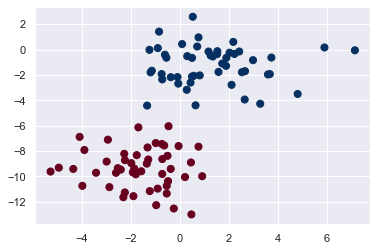

In [366]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [367]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (80, 2) , Y : (80,)
TESTING    X : (20, 2) , Y : (20,)


In [368]:
X

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

## Q.  Modeling
- Naive Bayes의 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:GaussianNB)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

## classification_report
- macro: 단순평균
- weighted: 각 클래스에 속하는 표본의 갯수로 가중평균
- accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
- precision: 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다
- recall: 재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다.
- f1-score: 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다. 베타가 1인 경우를 특별히 F1점수라고 한다.


In [369]:
from sklearn.naive_bayes import GaussianNB


model = GaussianNB() #모델생성
fitted=model.fit(train_x,train_y)
y_pred=fitted.predict(test_x)
print(classification_report(test_y, y_pred))
#코드를 작성해주세요.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [370]:
from sklearn.metrics import accuracy_score
print('정확도 = ', accuracy_score(y_pred, test_y) *100)

정확도 =  100.0


In [371]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [372]:
test_y

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

나이브베이즈 모델에 적합시켰을때 정확도는 100퍼센트가 나오고 잘 구분한것을 알수있다.

## Q. Visualization
- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시각화를 하시오.(hint:matplotlib)
- 더미데이터 2000개를 만들고, 만들어진 데이터를 모델로 예측해서 배경으로 채우시오.(hint: np.random.RandomState, predict)

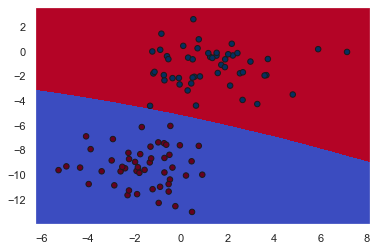

In [375]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu',
                edgecolor='k', s=30, clim=(y.min(), y.max()), zorder=3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# k-NN
k-최근접 이웃 알고리즘(또는 줄여서 k-NN)은 분류나 회귀에 사용되는 비모수 방식이다.

In [376]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets

### 더미데이터 생성

In [377]:
X, y = make_blobs(n_features=2, centers=3)

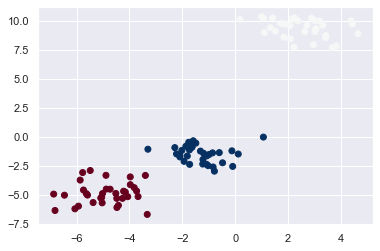

In [378]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')

In [379]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (80, 2) , Y : (80,)
TESTING    X : (20, 2) , Y : (20,)


## Q. Modeling
- k-NN 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:KNeighborsClassifier)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [380]:
#코드를 작성해주세요.

model2 = KNeighborsClassifier()
fitted2=model2.fit(train_x,train_y)
y_pred2=fitted2.predict(test_x)
print(classification_report(test_y, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [381]:
print('정확도 = ', accuracy_score(y_pred2, test_y)*100)

정확도 =  100.0


knn 모델에 적합시켰을때 정확도는 100퍼센트가 나오고 잘 구분한것을 알수있다.

## Q. Visualization
- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시각화를 하시오.(hint:matplotlib)

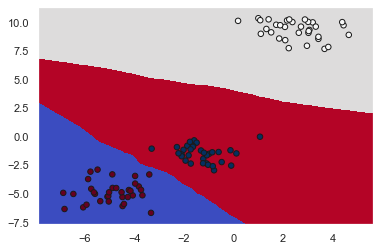

In [382]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu',
                edgecolor='k', s=30, clim=(y.min(), y.max()), zorder=3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Support Vector Machine
두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, Support Vector Machine(이하 SVM) 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다. 

### 더미데이터의 생성

In [383]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

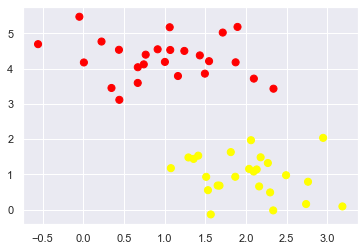

In [384]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [385]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (40, 2) , Y : (40,)
TESTING    X : (10, 2) , Y : (10,)


두개의 점을 하나의 직선으로 나누고자 할때 아래 그림과 같이 여러 방법이 있을 것이다.  
SVM 알고리즘은 두개의 Class의 간격을 최고로 많이 벌린 간격(Margin)을 구한다.  
이때 매우 엄격하게 두 개의 class를 분리하는 것을 HardMarin이라하고 좀더 유연하게 분리하는 것을 SoftMargin이라 한다.

(-1.0, 3.5)

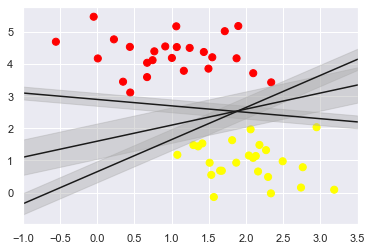

In [386]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit + d, 
                     edgecolor='none',
                     color='#AAAAAA', 
                     alpha=0.4)

plt.xlim(-1, 3.5)

## Q. Modeling
- Support Vector Machine 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:SVC)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [387]:
from sklearn.svm import SVC

model3 = SVC(kernel='linear', C=1E10)
fitted3=model3.fit(train_x,train_y)
y_pred3=fitted3.predict(test_x)
print(classification_report(test_y, y_pred3))
#코드를 작성해주세요.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         9

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [388]:
print('정확도 = ', accuracy_score(y_pred3, test_y)*100)

정확도 =  100.0


svm 모델에 적합시켰을때 정확도는 100퍼센트가 나오고 잘 구분한것을 알수있다.

## Q. Visualization

- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시작화를 하시오.(hint:matplotlib)
- HardMargin과 SoftMargin을 확인하기 위해 매개변수 C의 값을 10과 0.1로 주어 모델을 훈련시키고 시각화를 하시오.

In [389]:
models = (svm.SVC(kernel='linear', C=10),
          svm.SVC(kernel='linear', C=0.1))
        
         
models = (clf.fit(X, y) for clf in models)

In [390]:
titles = ('SVC with linear kernel C = 10 ',
          'SVC with linear kernel C = 0.1 ')
          

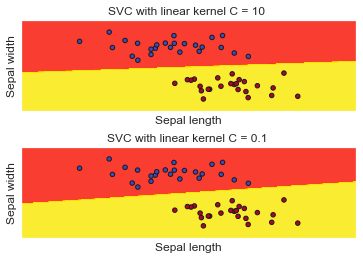

In [391]:
fig, sub = plt.subplots(2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap='autumn', alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# DecisionTree
결정 트리 학습법(decision tree learning)은 어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델로써 결정 트리를 사용한다.

### 더미데이터의 생성

In [392]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

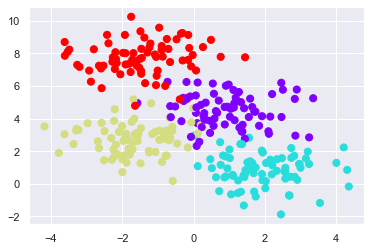

In [393]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [394]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (240, 2) , Y : (240,)
TESTING    X : (60, 2) , Y : (60,)


## Q. Modeling

- DecisionTree 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:DecisionTreeClassifier)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [395]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(max_depth=5)
fitted4=model4.fit(train_x,train_y)
y_pred4=fitted4.predict(test_x)
print(classification_report(test_y, y_pred4))
#코드를 작성해주세요.

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.88      0.94        17
           2       1.00      0.86      0.92        14
           3       1.00      0.87      0.93        15

    accuracy                           0.90        60
   macro avg       0.93      0.90      0.90        60
weighted avg       0.93      0.90      0.91        60



In [396]:
print('정확도 = ', accuracy_score(y_pred4, test_y)*100)

정확도 =  90.0


In [397]:
DecisionTree 모델에 적합시켰을때 정확도는 91퍼센트가 나오고 잘 구분한것을 알수있다.

SyntaxError: invalid syntax (<ipython-input-397-2eab550b6698>, line 1)

## Q. Visualization
- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시작화를 하시오.(hint:matplotlib)

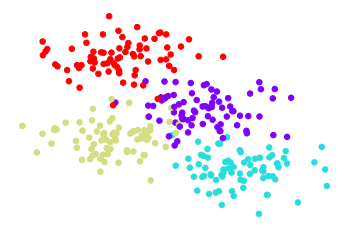

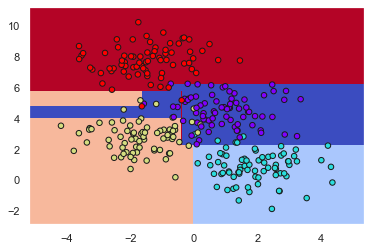

In [399]:
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
           clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
ax.axis('off')
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))



x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.coolwarm)

    # Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow',
                edgecolor='k', s=30, clim=(y.min(), y.max()), zorder=3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

#코드를 작성해주세요.